In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data .csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.928596,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [4]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.shape

(5178, 12)

In [7]:
df.drop('id', axis=1, inplace=True)

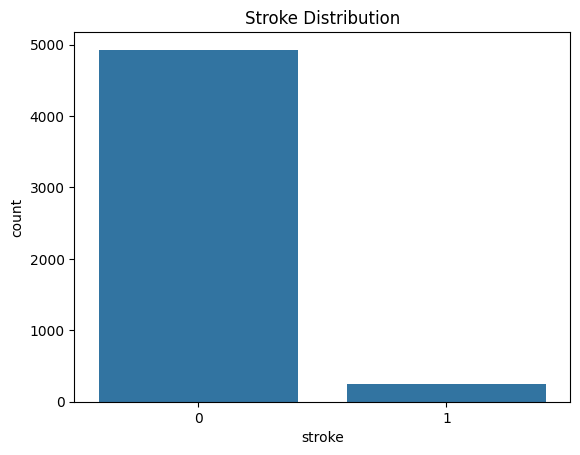

In [8]:
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()


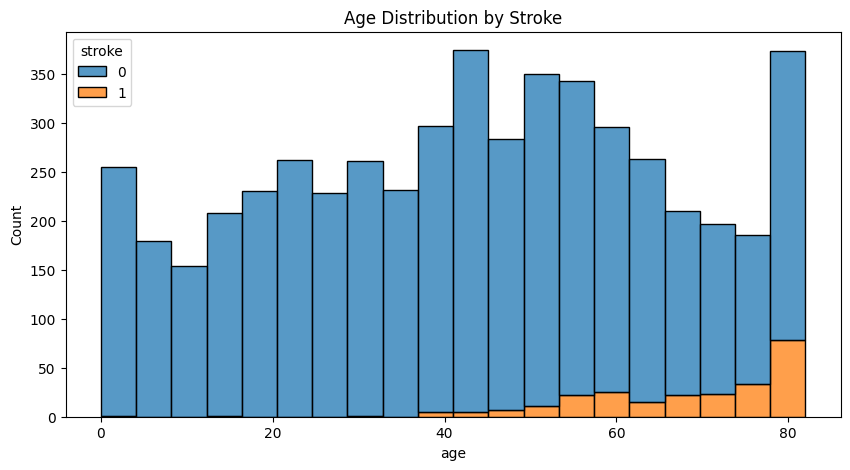

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="age", hue="stroke", bins=20, multiple="stack")
plt.title("Age Distribution by Stroke")
plt.show()

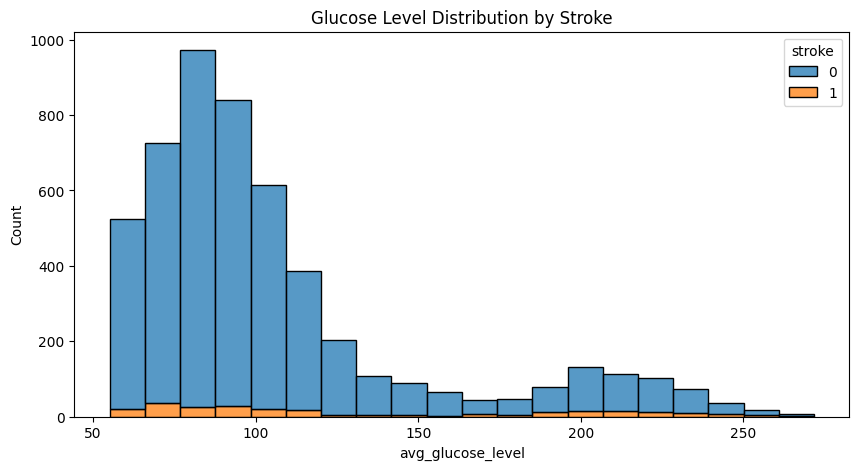

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", bins=20, multiple="stack")
plt.title("Glucose Level Distribution by Stroke")
plt.show()


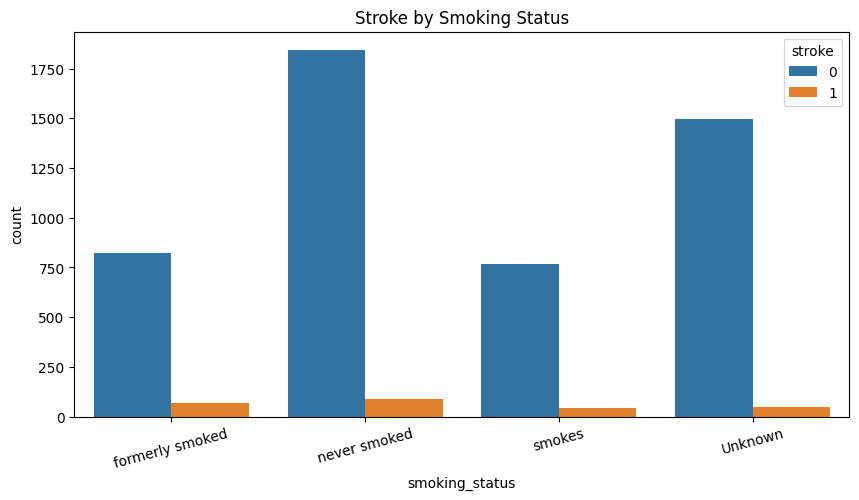

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="smoking_status", hue="stroke")
plt.title("Stroke by Smoking Status")
plt.xticks(rotation=15)
plt.show()

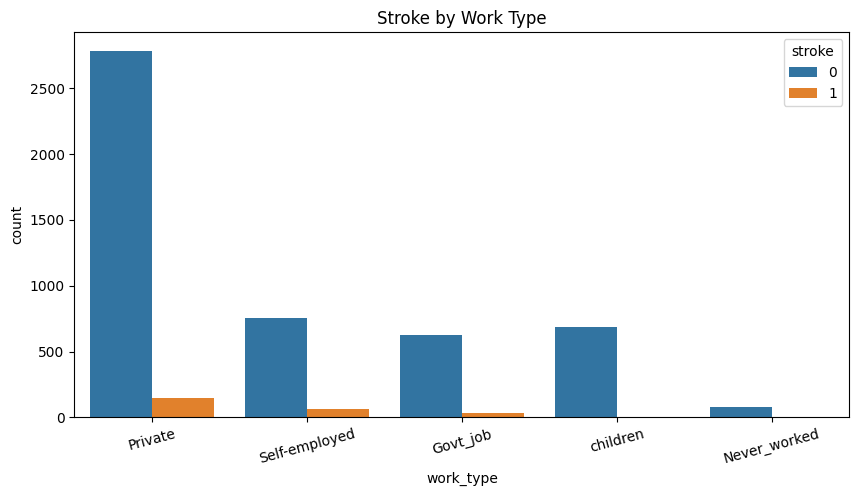

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="work_type", hue="stroke")
plt.title("Stroke by Work Type")
plt.xticks(rotation=15)
plt.show()

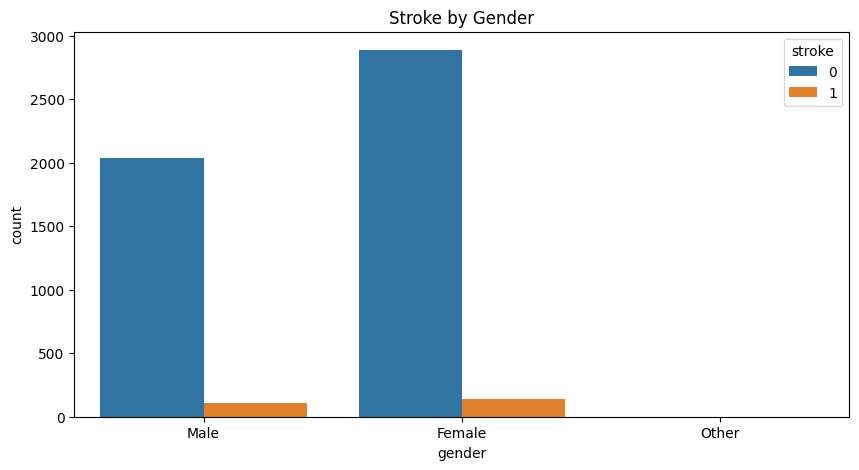

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="gender", hue="stroke")
plt.title("Stroke by Gender")
plt.show()

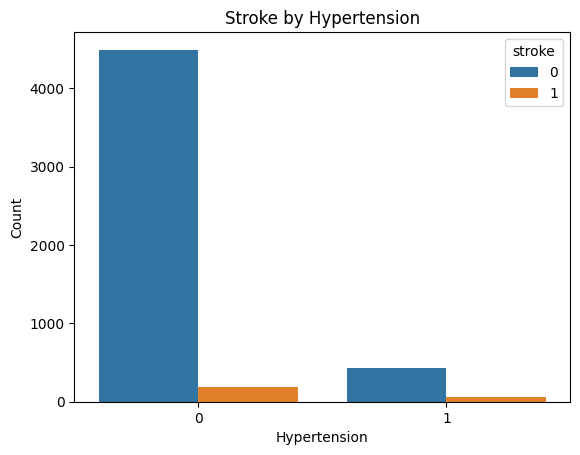

In [14]:
sns.countplot(data=df, x='hypertension', hue='stroke')
plt.title("Stroke by Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.show()

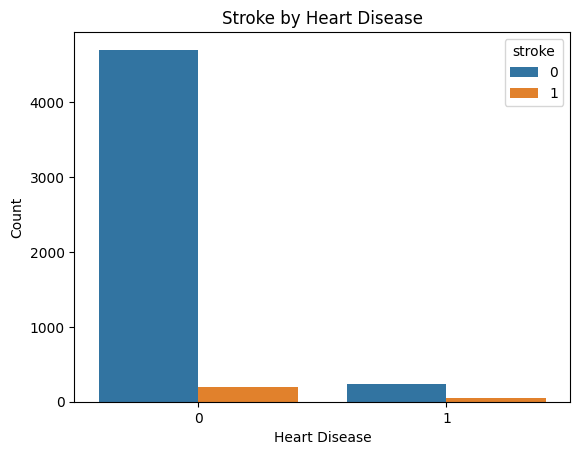

In [15]:
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title("Stroke by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

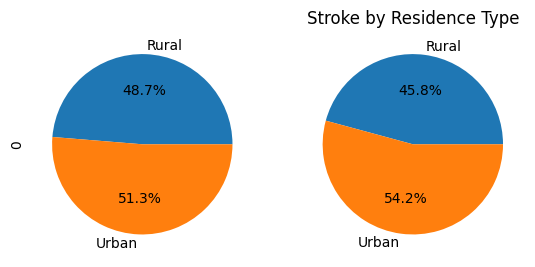

In [16]:
res_counts = df.groupby('Residence_type')['stroke'].value_counts().unstack()
res_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False)
plt.title("Stroke by Residence Type")
plt.ylabel("")
plt.show()

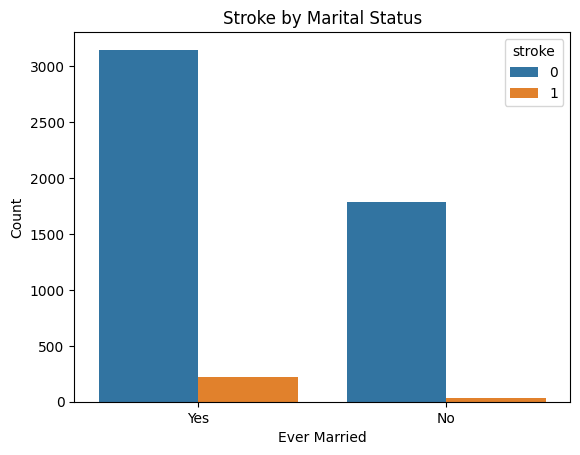

In [17]:
sns.countplot(data=df, x='ever_married', hue='stroke')
plt.title("Stroke by Marital Status")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.show()

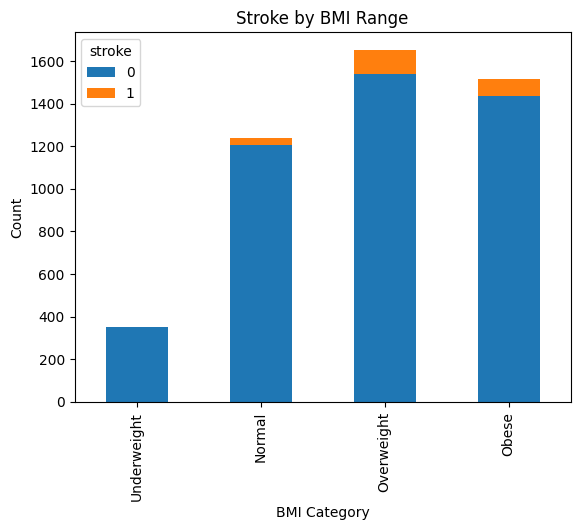

In [18]:
df['bmi_range'] = pd.cut(df['bmi'], bins=[10, 18.5, 24.9, 29.9, 40], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
fig5, ax5 = plt.subplots()
pd.crosstab(df['bmi_range'], df['stroke']).plot(kind='bar', stacked=True, ax=ax5)
ax5.set_title("Stroke by BMI Range")
ax5.set_xlabel("BMI Category")
ax5.set_ylabel("Count")
plt.show()

In [19]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [20]:
y.value_counts()

,count
stroke,
0,4929
1,249


In [24]:
# Apply encoding to the full dataset
X_encoded = pd.get_dummies(X, drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train))


Before SMOTE: Counter({0: 3450, 1: 174})
After SMOTE: Counter({0: 3450, 1: 3450})


In [28]:
print("\n=== Logistic Regression ===")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# === Training metrics ===
y_train_pred = model_lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# === Testing metrics ===
y_test_pred = model_lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# === Print results ===
print("\n--- Training Metrics ---")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1 Score:  {train_f1:.4f}")

print("\n--- Testing Metrics ---")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1 Score:  {test_f1:.4f}")



=== Logistic Regression ===

--- Training Metrics ---
Accuracy:  0.8972
Precision: 0.8972
Recall:    0.8972
F1 Score:  0.8972

--- Testing Metrics ---
Accuracy:  0.8655
Precision: 0.9261
Recall:    0.8655
F1 Score:  0.8920


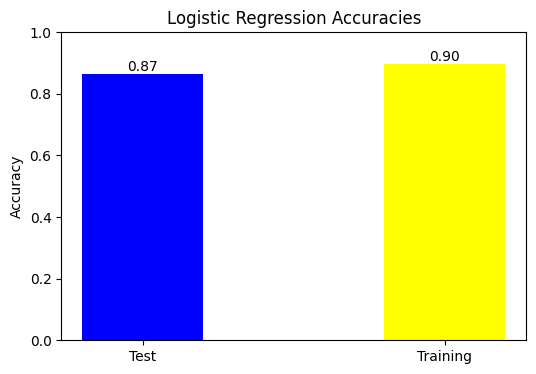

In [29]:
# Visualization
categories = ["Test","Training"]
accuracies = [test_accuracy,train_accuracy]
plt.figure(figsize=(6, 4))
plt.bar(categories, accuracies, color=["blue","yellow"], width=0.4)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")
plt.title("Logistic Regression Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [30]:
print("\n=== Random Forest ===")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
# === Training metrics ===
y_train_pred = model_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred)
train_precision_rf = precision_score(y_train, y_train_pred, average='weighted')
train_recall_rf = recall_score(y_train, y_train_pred, average='weighted')
train_f1_rf = f1_score(y_train, y_train_pred, average='weighted')
# === Testing metrics ===
y_test_pred_rf = model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
test_precision_rf = precision_score(y_test, y_test_pred, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred, average='weighted')

print("\n--- Training Metrics ---")
print(f"Accuracy:  {train_accuracy_rf:.4f}")
print(f"Precision: {train_precision_rf:.4f}")
print(f"Recall:    {train_recall_rf:.4f}")
print(f"F1 Score:  {train_f1_rf:.4f}")

print("\n--- Testing Metrics ---")
print(f"Accuracy:  {test_accuracy_rf:.4f}")
print(f"Precision: {test_precision_rf:.4f}")
print(f"Recall:    {test_recall_rf:.4f}")
print(f"F1 Score:  {test_f1_rf:.4f}")



=== Random Forest ===

--- Training Metrics ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

--- Testing Metrics ---
Accuracy:  0.8655
Precision: 0.9261
Recall:    0.8655
F1 Score:  0.8920


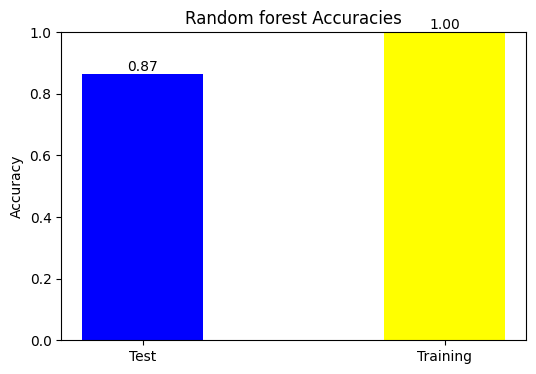

In [31]:
# Visualization
categories = ["Test","Training"]
accuracies = [test_accuracy_rf,train_accuracy_rf]
plt.figure(figsize=(6, 4))
plt.bar(categories, accuracies, color=["blue","yellow"], width=0.4)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")
plt.title("Random forest Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [32]:
print("\n=== Gradient Boosting ===")
model_gbt = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gbt.fit(X_train, y_train)
# === Training metrics ===
y_train_pred = model_gbt.predict(X_train)
train_accuracy_gbt = accuracy_score(y_train, y_train_pred)
train_precision_gbt = precision_score(y_train, y_train_pred, average='weighted')
train_recall_gbt = recall_score(y_train, y_train_pred, average='weighted')
train_f1_gbt = f1_score(y_train, y_train_pred, average='weighted')

# === Testing metrics ===
y_test_pred = model_gbt.predict(X_test)
test_accuracy_gbt = accuracy_score(y_test, y_test_pred)
test_precision_gbt = precision_score(y_test, y_test_pred, average='weighted')
test_recall_gbt = recall_score(y_test, y_test_pred, average='weighted')
test_f1_gbt = f1_score(y_test, y_test_pred, average='weighted')

print("\n--- Training Metrics ---")
print(f"Accuracy:  {train_accuracy_gbt:.4f}")
print(f"Precision: {train_precision_gbt:.4f}")
print(f"Recall:    {train_recall_gbt:.4f}")
print(f"F1 Score:  {test_f1_gbt:.4f}")

print("\n--- Testing Metrics ---")
print(f"Accuracy:  {test_accuracy_gbt:.4f}")
print(f"Precision: {test_precision_gbt:.4f}")
print(f"Recall:    {test_recall_gbt:.4f}")
print(f"F1 Score:  {test_f1_gbt:.4f}")




=== Gradient Boosting ===

--- Training Metrics ---
Accuracy:  0.9399
Precision: 0.9399
Recall:    0.9399
F1 Score:  0.9083

--- Testing Metrics ---
Accuracy:  0.8964
Precision: 0.9219
Recall:    0.8964
F1 Score:  0.9083


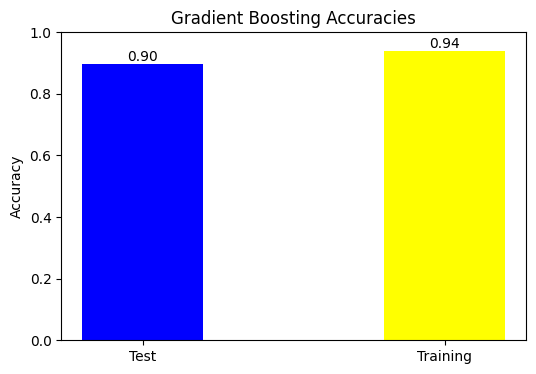

In [33]:
# Visualization
categories = ["Test","Training"]
accuracies = [test_accuracy_gbt,train_accuracy_gbt]
plt.figure(figsize=(6, 4))
plt.bar(categories, accuracies, color=["blue","yellow"], width=0.4)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")
plt.title("Gradient Boosting Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [34]:
print("\n=== Support Vector Machine (SVM) ===")
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train, y_train)

# === Training metrics ===
y_train_pred = model_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
train_precision_svm = precision_score(y_train, y_train_pred, average='weighted')
train_recall_svm = recall_score(y_train, y_train_pred, average='weighted')
train_f1_svm = f1_score(y_train, y_train_pred, average='weighted')

# === Testing metrics ===
y_test_pred = model_svm.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred)
test_precision_svm = precision_score(y_test, y_test_pred, average='weighted')
test_recall_svm = recall_score(y_test, y_test_pred, average='weighted')
test_f1_svm = f1_score(y_test, y_test_pred, average='weighted')


print("\n--- Training Metrics ---")
print(f"Accuracy:  {train_accuracy_svm:.4f}")
print(f"Precision: {train_precision_svm:.4f}")
print(f"Recall:    {train_recall_svm:.4f}")
print(f"F1 Score:  {train_f1_svm:.4f}")

print("\n--- Testing Metrics ---")
print(f"Accuracy:  {test_accuracy_svm :.4f}")
print(f"Precision: {test_precision_svm:.4f}")
print(f"Recall:    {test_recall_svm:.4f}")
print(f"F1 Score:  {test_f1_svm:.4f}")




=== Support Vector Machine (SVM) ===

--- Training Metrics ---
Accuracy:  0.7796
Precision: 0.7851
Recall:    0.7796
F1 Score:  0.7785

--- Testing Metrics ---
Accuracy:  0.7117
Precision: 0.9489
Recall:    0.7117
F1 Score:  0.7941


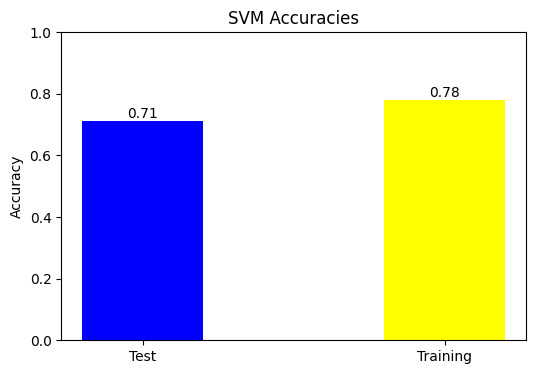

In [35]:
# Visualization
categories = ["Test","Training"]
accuracies = [test_accuracy_svm,train_accuracy_svm]
plt.figure(figsize=(6, 4))
plt.bar(categories, accuracies, color=["blue","yellow"], width=0.4)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")
plt.title("SVM Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()